In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.loadtxt('data.txt', skiprows=1)
indices = np.loadtxt('pares.txt', dtype=int)

In [3]:
x = data[:,0] # Mpc/h
y = data[:,1]
z = data[:,2]
vx = data[:,3]
vy = data[:,4]
vz = data[:,5]
mass = data[:,6]
id_a = indices[:,0]
id_b = indices[:,1]

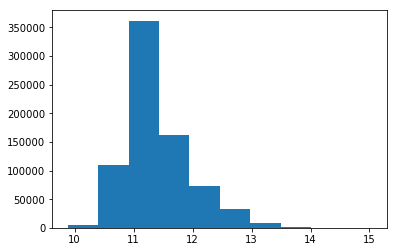

In [4]:
a = plt.hist(np.log10(mass))

In [5]:
dx   = x[id_a] - x[id_b]
dx[dx>100.0] = 250.0 - dx[dx>100.0]
dx[dx<-100.0] = 250.0 + dx[dx<-100.0] 

dy   = y[id_a] - y[id_b]
dy[dy>100.0] = 250.0 - dy[dy>100.0]
dy[dy<-100.0] = 250.0 + dy[dy<-100.0] 

dz   = z[id_a] - z[id_b]
dz[dz>100.0] = 250.0 - dz[dz>100.0]
dz[dz<-100.0] = 250.0 + dz[dz<-100.0] 

r = np.sqrt(dx**2 + dy**2 + dz**2)

dvx = (vx[id_a] - vx[id_b]) + dx*100.0
dvy = (vy[id_a] - vy[id_b]) + dy*100.0
dvz = (vz[id_a] - vz[id_b]) + dz*100.0

vrx = dvx*dx/r
vry = dvy*dy/r
vrz = dvz*dz/r

vr = vrx + vry + vrz
v = np.sqrt(dvx**2 + dvy**2 +dvz**2)

vtx = dvx - vrx
vty = dvy - vry
vtz = dvz - vrz

vt = np.sqrt(vtx**2 + vty**2 +vtz**2)

m = mass[id_a] + mass[id_b]

In [6]:
G = 4.301E-9 # Mpc Msun^-1 (km/s)^2
T = 13.4 * 3.15E16 # age of the universe in seconds
mpc_to_km =3.08E19 
hubble =0.74

In [7]:
v_c = np.sqrt(G*m/r)
v_h = ((r/hubble)*mpc_to_km/T)
v_a = (G*(m/hubble)/(r/hubble)**2)*T
v_a = v_a/mpc_to_km

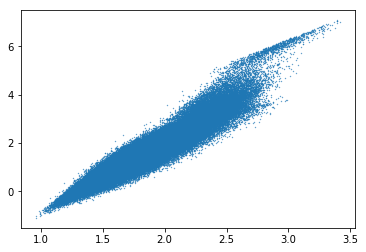

In [8]:
plt.scatter(np.log10(v_c), np.log10(v_a), s=0.1)

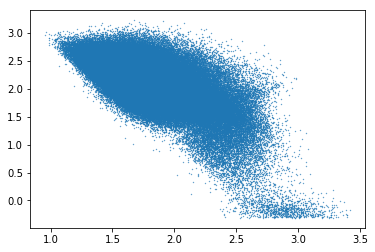

In [9]:
plt.scatter(np.log10(v_c), np.log10(v_h), s=0.1)

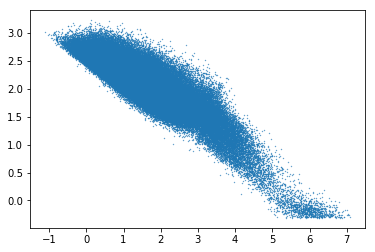

In [10]:
plt.scatter(np.log10(v_a), np.log10(v_h), s=0.1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

[-0.13449559  0.0636133  -0.00929883]
-45.0396045203
0.0208087472179


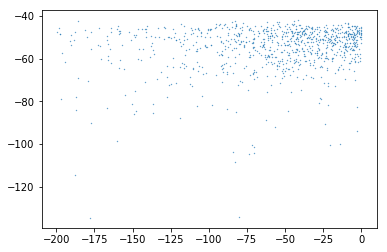

In [46]:
near = (vr<0.0) & (r>0.5) & (vt<150.0) & (vr>-200) & (r<1.0)
X=np.array([v_c[near], v_h[near], v_a[near]])
X = X.T
Y=vr[near]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
clf = linear_model.LinearRegression()
clf.fit(X_train, Y_train)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X_test, Y_test))
vr_predict  = clf.predict(X_test)
plt.scatter(Y_test, vr_predict, s=0.1)

In [47]:
def f_timing(theta, c):
    a = np.sin(theta)*(theta - np.sin(theta))
    a = a/(1.0-np.cos(theta))**2
    return a-c
def m_timing(theta, R, V):
    M = R*V**2/G * (1.0-np.cos(theta))**2/(np.sin(theta)**2) * (1.0/(1.0-np.cos(theta)))
    return M

0.666669029266


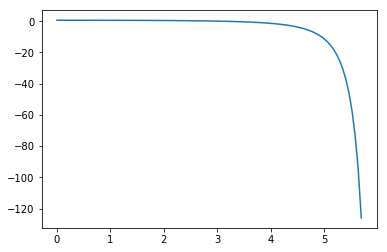

In [48]:
tt = np.linspace(1E-5,5.7, 100)
ff = f_timing(tt,0)
print(ff[0])
plt.plot(tt,ff)

In [49]:
from scipy.optimize import brentq

In [50]:
tt_timing = brentq(f_timing, 1E-3, 6.0, args=(-2.5))
mm_timing = m_timing(tt_timing, 0.77, -100.0)
print(mm_timing)

2.92941573341e+12


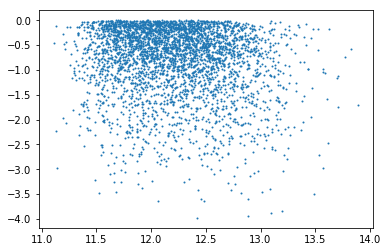

In [51]:
ratio_timing = T*vr[near]/((r[near]/hubble)*mpc_to_km)
mass_input = m[near]/hubble
r_input = r[near]/hubble
v_input = vr[near]
plt.scatter(np.log10(mass_input), ratio_timing, s=1.0)

In [52]:
n_points = len(ratio_timing)
print(n_points)
mass_timing = np.zeros(n_points)
for i in range(n_points):
    tt_timing = brentq(f_timing, 1E-3, 6.0, args=(ratio_timing[i]))
    mass_timing[i] = m_timing(tt_timing, r_input[i], v_input[i])
    #print(mass_timing[i])

3562


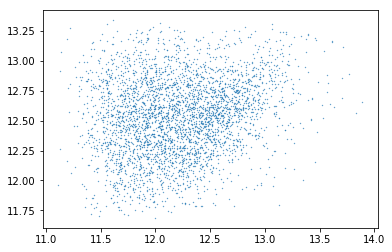

In [53]:
plt.scatter(np.log10(mass_input), np.log10(mass_timing), s=0.1)

In [54]:
logratio = np.log10(mass_timing) - np.log10(mass_input)

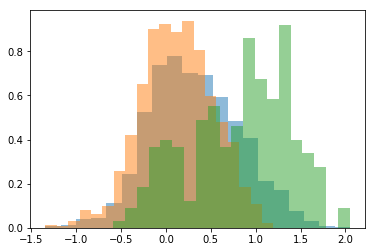

In [55]:
a = plt.hist(logratio, bins=20, alpha=0.5, normed=True)
a = plt.hist(logratio[np.log10(mass_timing)<12.5], bins=20, alpha=0.5, normed=True)
a = plt.hist(logratio[np.log10(mass_timing)>13.0], bins=20, alpha=0.5, normed=True)